# Repaso Módulo 1 - Optimización. <font color=blue>Tipo de examen</font>.

## Primer punto. Optimización de funciones escalares usando `sympy'.

**Enunciado**: Un depósito abierto de latón con base cuadrada y capacidad para 4 000 litros, ¿qué dimensiones debe
tener para que su fabricación sea lo más económica posible?

Punto 1: Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). 

Punto 2: Resuelva el problema utilizando sympy


## Solución

### Planteamiento del problema

Llamamos $x$ al lado de la base e $y$ a la altura del depósito. Así, el volumen es:

$$V=x^2y=4000$$

$$ y= \frac{4000}{x^2}$$

La superficie total del depósito  será: 

$$A=x^2 + 4xy = x^2 + \frac{16000}{x}, \quad x>0$$

Buscamos x para que A sea mínima:



Usando `sympy` 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_latex='mathjax')

In [4]:
# Declaramos la variable simbolica x
sym.var('x',real='true')

x

In [5]:
# Definimos funcion area del rectangulo
def A(x):
    return x**2 + 16000/x

In [6]:
# Derivamos funcion AR(x)
dA = sym.diff(A(x), x)
dA

      16000
2⋅x - ─────
         2 
        x  

In [7]:
# Hallamos puntos criticos
xc = sym.solve(dA, x)
xc

[20]

In [8]:
# Evaluamos en puntos criticos
A(xc[0])

1200

Veamos que es un mínimo: 

In [9]:
# Derivamos funcion AR(x)
d2A = sym.diff(A(x), x,2)
d2A

  ⎛    16000⎞
2⋅⎜1 + ─────⎟
  ⎜       3 ⎟
  ⎝      x  ⎠

Si $x=20$, d2A>0, por tanto, hay un mínimo.

In [10]:
d2Anum=sym.lambdify(x,d2A)
d2Anum(xc[0])

6

**Conclusión:**

Por tanto, el lado de la base debe medir, $x = 20 dm$ y la altura, $y = 10 dm$. 

## Segundo punto. Programación lineal.

**Enunciado.** 

Una compañía tiene dos minas: la mina $A$ produce diariamente 1 tonelada de carbón de antracita de alta calidad, 2 toneladas de carbón de calidad media y 4 toneladas de carbón de baja calidad; la mina $B$ produce 2 toneladas de cada una de las tres clases. Esta compañía necesita 70 toneladas de carbón de alta calidad, 130 de calidad media y 150 de baja calidad. 

Los gastos diarios de la mina $A$ ascienden a 500 u.m. y los de la mina $B$ a 750 u.m. ¿Cuántos días deberán trabajar en cada mina para que los costos sean mínimos? 

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Punto 2**: Resuelva el problema utilizando la función linprog. ¿Cuántos días deberán trabajar en cada mina para que los costos sean mínimos?



## Solución

Como se quiere minimizar el costo total, entonces el problema es


$$\min_{x_1,x_2} 500x_1 + 750x_2,$$

donde 

$x_1=$Número de días a explotar la mina $A$, 

$x_2=$Número de días a explotar la mina $B$. 


Además, las restricciones son:

$$   x_1 + 2 x_2 \geq 70$$
$$ 2 x_1 + 2 x_2 \geq 130$$
$$ 4 x_1 + 2 x_2 \geq 150$$

$$x_1\geq0, \quad x_2 \geq0$$

In [11]:
# Escriba acá las matrices como arreglos de Numpy
c = np.array([500, 750])
A = -np.array([[1, 2],
               [2, 2],
               [4, 2],
               [1, 0],
               [0, 1]])
b = -np.array([70,130,150,0,0])

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [12]:
import scipy.optimize as opt

In [13]:
trabajadores = opt.linprog(c, A_ub=A, b_ub=b)
trabajadores

     fun: 33750.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 60.,   5., 100.,   0.,   0.])
  status: 0
 success: True
       x: array([60.,  5.])

- La mina $A$ se debe explotar 60 días
- La mina $B$ se debe explotar 5 días
- Los costos mínimos son de 33750 u.m. 

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `population_data.csv` contiene información histórica anual de México relativa a la población con educacion terciaria.


**Punto 1.** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [104]:
# Importar libreria pandas
import pandas as pd

In [105]:
file_name = 'population_data.csv'
data = pd.read_csv(file_name, header=None)
data

,0,1,2
0,1,1971,4.29087
1,2,1972,5.66648
2,3,1973,6.65540
3,4,1974,7.46832
4,5,1975,8.76624
5,6,1976,9.56276
6,7,1977,9.45010
7,8,1978,10.60069
8,9,1979,11.72961
9,10,1980,13.09215


**Punto 2.** Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [106]:
import numpy as np
import scipy.optimize as opt

In [107]:
x = data.iloc[:,0].values
y = data.iloc[:,2].values

In [108]:
def fun_obj(b, x, y, n):
    return np.sum((y-b.dot([x**i for i in range(n+1)]))**2)

In [109]:
b01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b01, args=(x,y,1))
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x,y,2))
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x,y,3))

In [110]:
ajuste1

      fun: 58.96790781978354
 hess_inv: array([[ 4.49275370e-02, -1.44927541e-03],
       [-1.44927541e-03,  6.16712943e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([3.59202795, 0.83524326])

In [111]:
ajuste2

      fun: 47.92284947152279
 hess_inv: array([[ 1.06851119e-01, -9.18972322e-03,  1.64690380e-04],
       [-9.18972322e-03,  1.02922728e-03, -2.05862976e-05],
       [ 1.64690380e-04, -2.05862976e-05,  4.38006332e-07]])
      jac: array([-0.00015259, -0.00499725,  0.06955624])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 476
      nit: 3
     njev: 93
   status: 2
  success: False
        x: array([4.76153841e+00, 6.89054413e-01, 3.11039915e-03])

In [112]:
ajuste3

      fun: 47.31560781798522
 hess_inv: array([[ 2.05640846e-01, -3.31346848e-02,  1.42476336e-03,
        -1.78733754e-05],
       [-3.31346848e-02,  6.83308275e-03, -3.26006796e-04,
         4.33220583e-06],
       [ 1.42476336e-03, -3.26006796e-04,  1.65103715e-05,
        -2.27976827e-07],
       [-1.78733754e-05,  4.33220583e-06, -2.27976827e-07,
         3.23371412e-09]])
      jac: array([ -0.08245707,  -0.78220844, -18.22581482,   1.71277952])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 480
      nit: 4
     njev: 78
   status: 2
  success: False
        x: array([ 4.41508421e+00,  7.72231383e-01, -1.25472362e-03,  6.18376493e-05])

In [113]:
xpoints = x
ypoints = y
yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints)
yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints+ ajuste2.x[2]*(xpoints)**2)
yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ ajuste3.x[2]*(xpoints)**2+ ajuste3.x[3]*(xpoints)**3)

In [114]:
import matplotlib.pyplot as plt

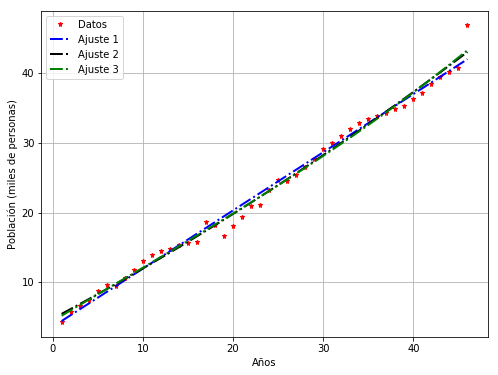

In [115]:
plt.figure(figsize=(8,6))
plt.plot(xpoints, ypoints, 'r*', ms=5, label='Datos')
plt.plot(xpoints, yhat1, '-.b', lw=2, label='Ajuste 1')
plt.plot(xpoints, yhat2, '-.k', lw=2, label='Ajuste 2')
plt.plot(xpoints, yhat3, '-.g', lw=2, label='Ajuste 3')
plt.grid()
plt.xlabel('Años')
plt.ylabel('Población (miles de personas)')
plt.legend(loc='best')

[58.96790781978354, 47.92284947152279, 47.31560781798522]

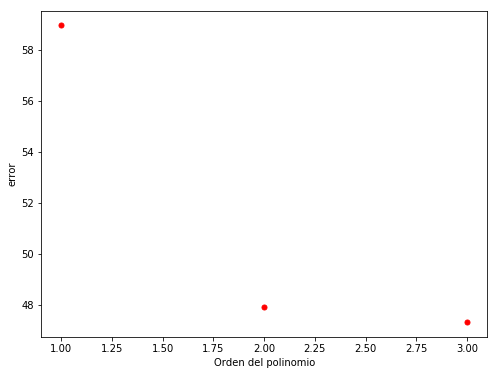

In [116]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4), error, 'ro', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

error

*Conclusión*

Según la gráfica anterior, el polinomio que mejor se ajusta es el de segundo orden.

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime la población en el año 2017 y compare con el dato real 46.85074

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [117]:
yhat1 = ajuste1.x[0]+ajuste1.x[1]*47
yhat2 = ajuste2.x[0]+ajuste2.x[1]*47 + ajuste2.x[2]*(47)**2
yhat3 = ajuste3.x[0]+ajuste3.x[1]*47 + ajuste3.x[2]*(47)**2 + ajuste3.x[3]*(47)**3
yhat1, yhat2, yhat3, 46.85074


(42.84846117356673, 44.017967550979186, 44.35844499105859, 46.85074)

*Conclusión*. El polinomio que mejor estima este dato es el polinomio de grado dos.